## Import data

The data is sourced from Kaggle.This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Feature Columns

- id: Unique ID for each home sold
- date: Date of the home sale
- price: Price of each home sold
- bedrooms: Number of bedrooms
- bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living: Square footage of the apartments interior living space
- sqft_lot: Square footage of the land space
- floors: Number of floors
- waterfront: - A dummy variable for whether the apartment was overlooking the waterfront or not
- view: An index from 0 to 4 of how good the view of the property was
- condition: - An index from 1 to 5 on the condition of the apartment
- grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
- sqft_above: The square footage of the interior housing space that is above ground level
- sqft_basement: The square footage of the interior housing space that is below ground level
- yr_built: The year the house was initially built
- yr_renovated: The year of the house’s last renovation
- zipcode: What zipcode area the house is in
- lat: Lattitude
- long: Longitude
- sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15: The square footage of the land lots of the nearest 15 neighbors

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_excel(r'C:\Users\GRZEGORZ\OneDrive\Pulpit\House Data.xlsx')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<br>

## Cleaninig data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [5]:
df = df.drop('date', axis=1)


<br>

## Variable Analysis

In [6]:
df['price'].describe().round(2)

count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64

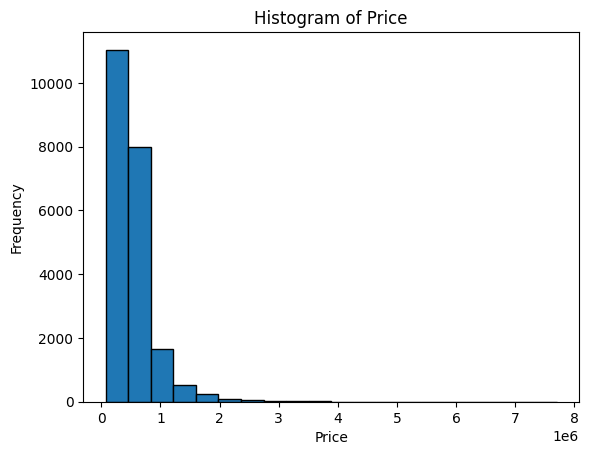

In [7]:
plt.hist(df['price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.rcParams['figure.figsize'] = [16, 6]
plt.show()

In [8]:
print("Skewness:")
print(df['price'].skew())

print("\nKurtosis:")
print(df['price'].kurtosis())


Skewness:
4.024069144684712

Kurtosis:
34.58554043194243


<br>

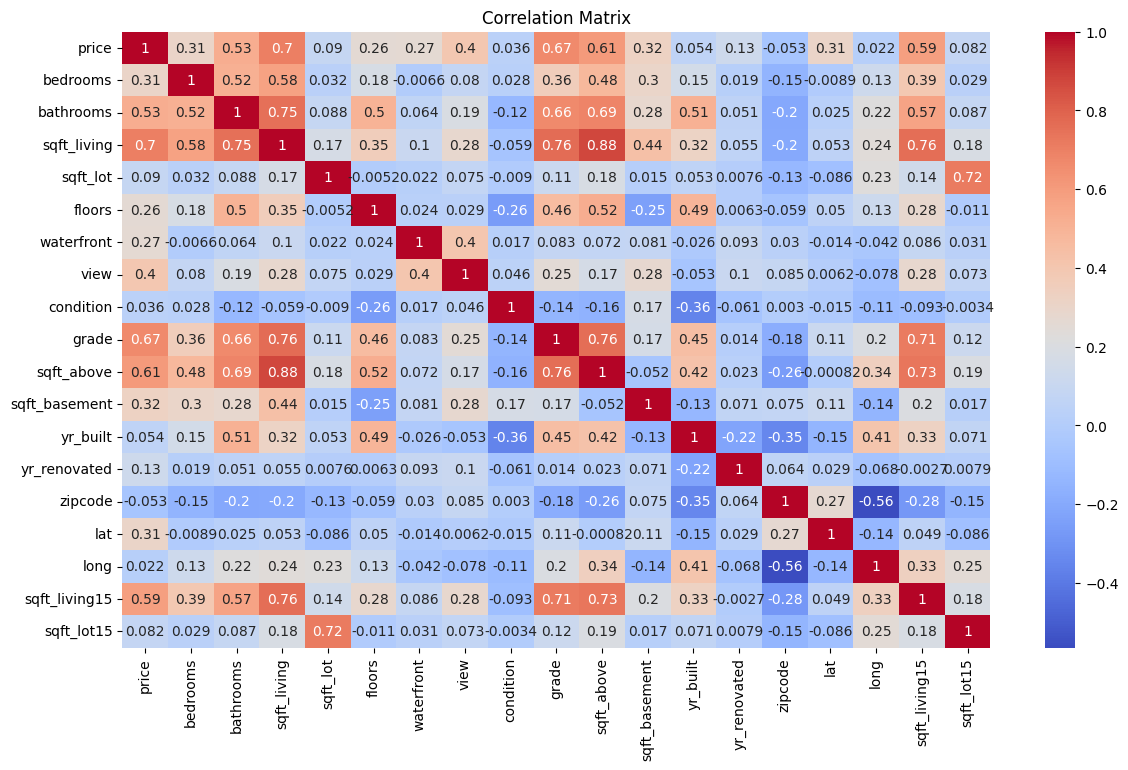

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

An analysis reveals a strong correlation between the <code>price</code> variable and the features <code>sqft_living</code> (0.7), <code>grade</code> (0.67) and <code>sqft_above</code> (0.61). This correlation suggests that these variables exert the most significant influence on determining the price. Consequently, variations in square footage of living space, overall grade assigned to the property and square footage above ground level are pivotal factors shaping the pricing dynamics.

<br>

### Bedrooms

In [21]:
df['bedrooms'].describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

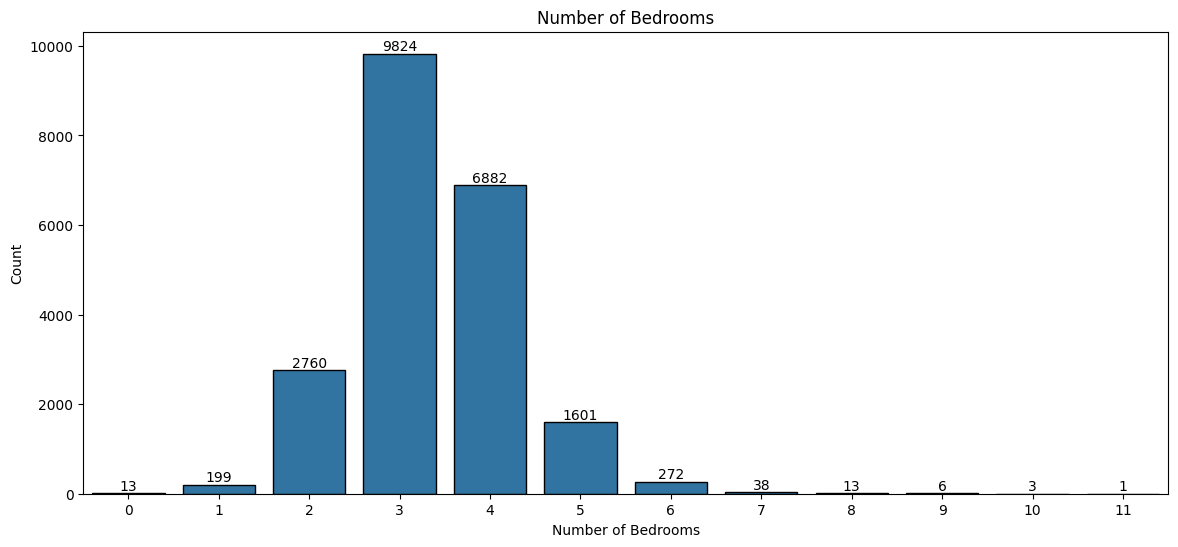

In [37]:
plt.figure(figsize=(14, 6))
sns.countplot(x='bedrooms', data=df, edgecolor='black')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Number of Bedrooms')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


The data highlights a notable trend in the number of bedrooms among sold properties, with a significant portion comprising 9824 units featuring 3 bedrooms, followed closely by 6882 units with 4 bedrooms. Moreover, it's evident that the vast majority of transactions involve properties with between 2 and 5 bedrooms, indicating a preference within this range. Interestingly, only a mere 62 out of 21,613 sold properties boast more than 6 bedrooms, suggesting that such properties are comparatively less common in the market.

<br>

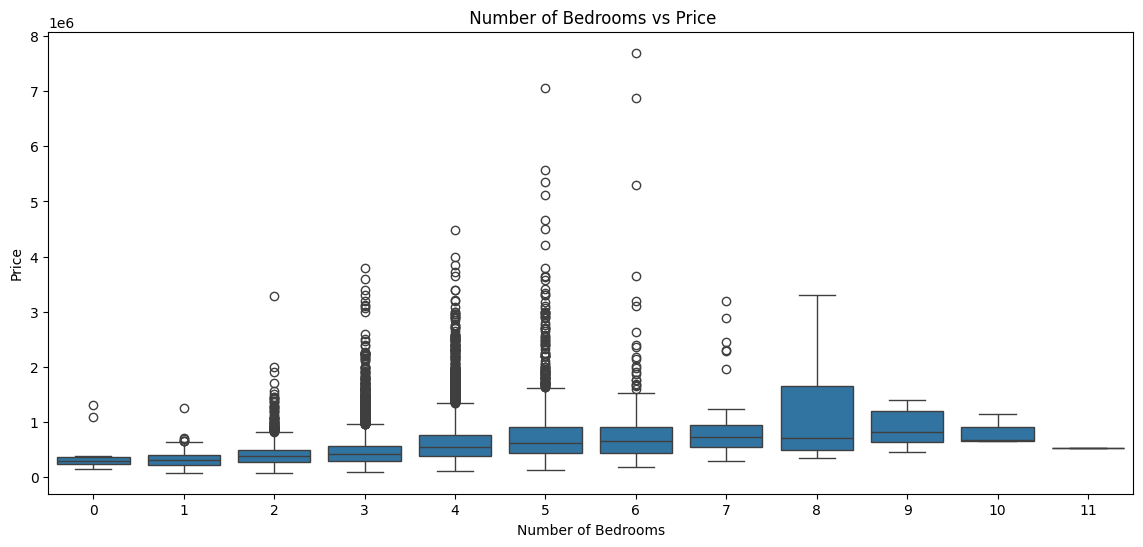

In [61]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=df['bedrooms'], y=df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title(' Number of Bedrooms vs Price')
plt.show()

Examining the above box plot, a clear pattern emerges: as the number of bedrooms increases, so does the spread of prices, indicated by larger box sizes. It is noteworthy that the highest concentration of outliers occurs within the range of properties with 2 to 5 bedrooms, which aligns with our earlier observation that the majority of transactions involve properties within this range. Additionally, there are also numerous outliers present for properties with 6 bedrooms, underscoring the trend that a higher number of bedrooms corresponds to a wider range of prices.

<br>

### Bathrooms

In [36]:
df['bathrooms'].describe()

count    21612.000000
mean         2.114774
std          0.770177
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

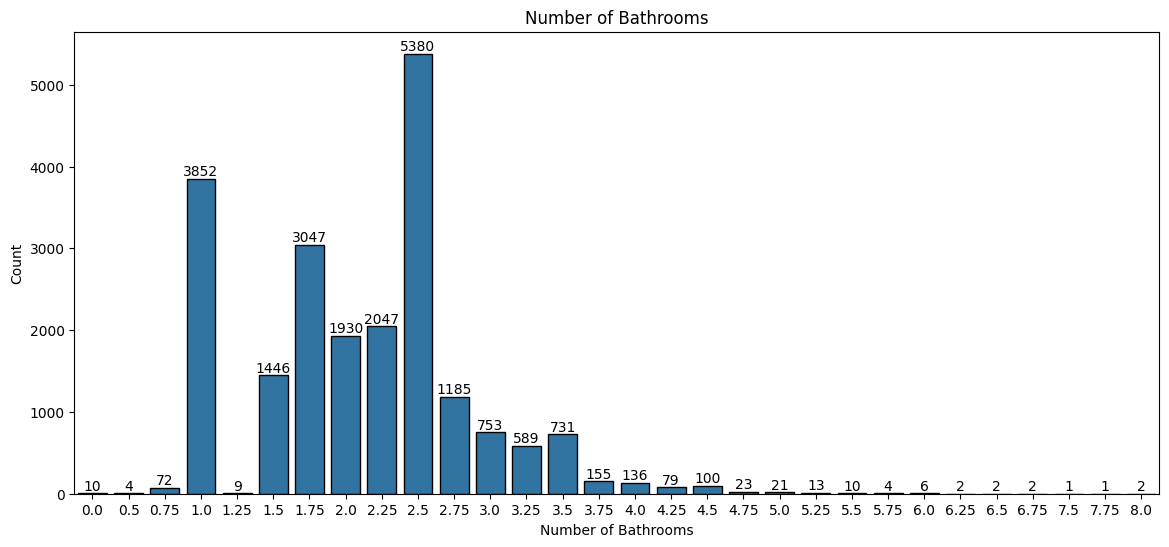

In [33]:
plt.figure(figsize=(14, 6))
sns.countplot(x='bathrooms', data=df, edgecolor='black')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Number of Bathrooms')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

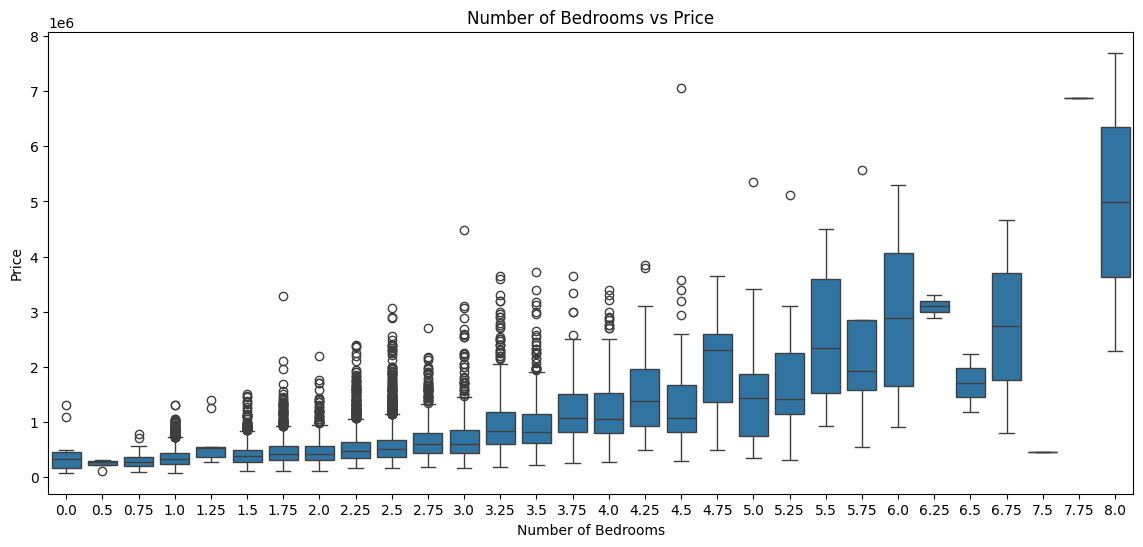

In [39]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=df['bathrooms'], y=df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Number of Bedrooms vs Price')
plt.show()

Similarly to the observations made regarding the number of bedrooms, the box plot for the number of bathrooms illustrates a comparable trend: as the number of bathrooms increases, there is a noticeable widening of the price range.

<br>

### Sqft_living

In [40]:
df['sqft_living'].describe()

count    21612.000000
mean      2079.921016
std        918.456818
min        290.000000
25%       1426.500000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

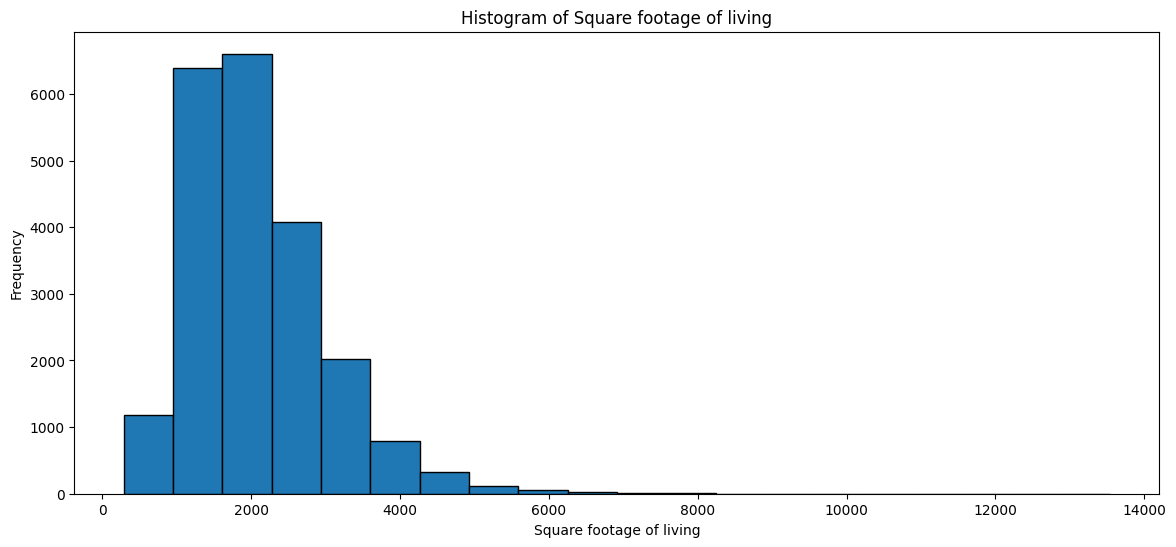

In [44]:
plt.figure(figsize=(14, 6))
plt.hist(df['sqft_living'], bins=20, edgecolor='black')
plt.xlabel('Square footage of living')
plt.ylabel('Frequency')
plt.title('Histogram of Square footage of living')
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()


The above histogram depicts the distribution of square footage of living space. It's evident that the majority of sold houses have a square footage of living space falling within the range of 1500 to 2500. Additionally, the distribution's tail is thick, indicating the presence of outliers, suggesting that there are houses with significantly higher square footage of living space compared to the bulk of the dataset.

<br>

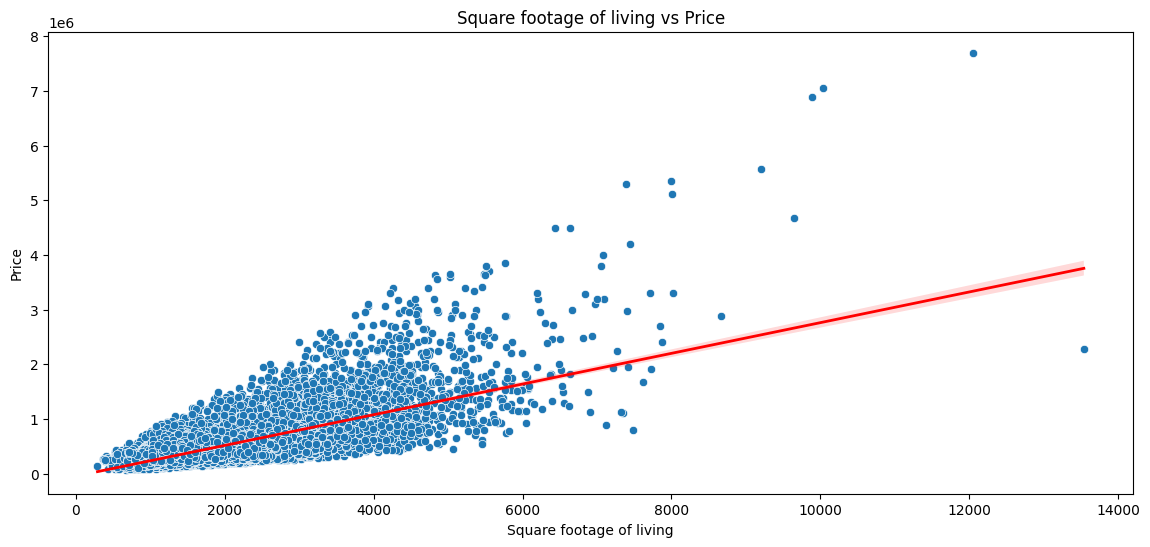

In [48]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
sns.regplot(x='sqft_living', y='price', data=df, scatter=False, color='red', line_kws={'linewidth': 2})
plt.xlabel('Square footage of living')
plt.ylabel('Price')
plt.title('Square footage of living vs Price')
plt.show()


In [53]:
from sklearn.metrics import r2_score

slope, intercept = np.polyfit(df['sqft_living'], df['price'], 1)
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
print(line_eq)
predicted_price = slope * df['sqft_living'] + intercept
r2 = r2_score(df['price'], predicted_price)
print(f"R-squared: {r2:.2f}")

y = 280.63x + -43603.35
R-squared: 0.49


The scatter plot above illustrates the relationship between square footage of living space and price. To assess the influence of square footage of living space on price, a linear trend function was estimated, yielding the equation:\
y = 280.63x - 43605.35\
which can be interpreted as: an increase in square footage of living space for example by 1000 square footage will result in a price increase of approximately 237024.65 USD

<br>

### Sqft_lot

In [55]:
df['sqft_lot'].describe()

count    2.161200e+04
mean     1.510739e+04
std      4.142142e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.619000e+03
75%      1.068825e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

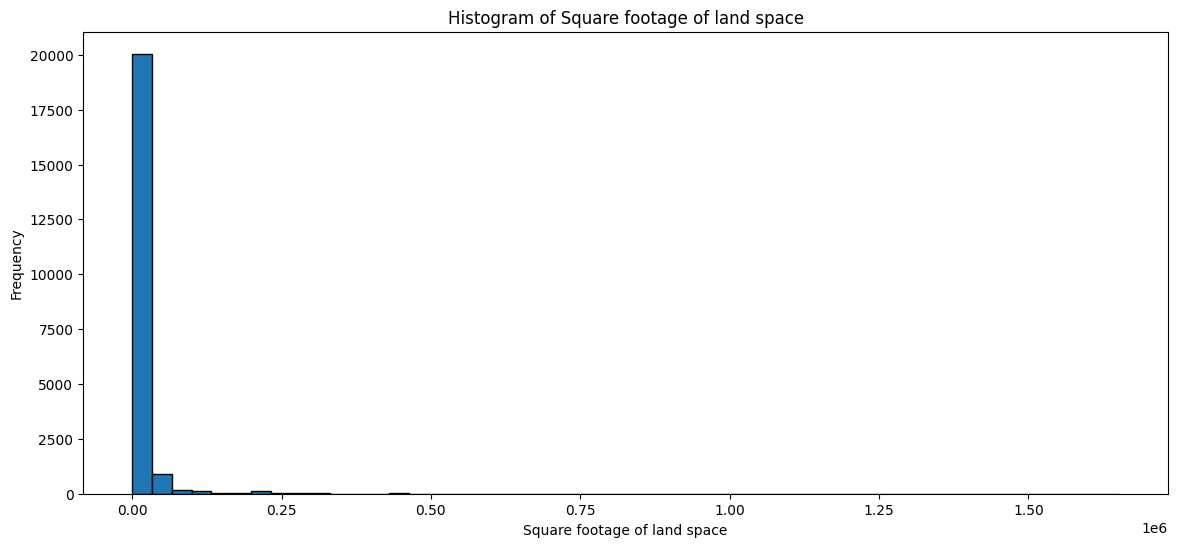

In [58]:
plt.figure(figsize=(14, 6))
plt.hist(df['sqft_lot'], bins=50, edgecolor='black')
plt.xlabel('Square footage of land space')
plt.ylabel('Frequency')
plt.title('Histogram of Square footage of land space')
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

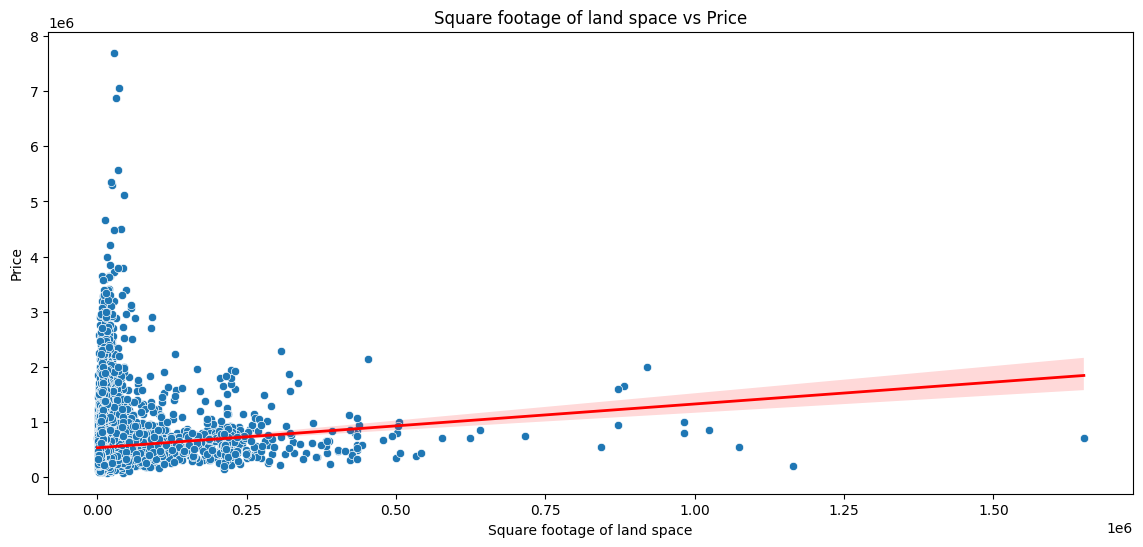

In [59]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='sqft_lot', y='price', data=df)
sns.regplot(x='sqft_lot', y='price', data=df, scatter=False, color='red', line_kws={'linewidth': 2})
plt.xlabel('Square footage of land space')
plt.ylabel('Price')
plt.title('Square footage of land space vs Price')
plt.show()

In [60]:
slope, intercept = np.polyfit(df['sqft_lot'], df['price'], 1)
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
print(line_eq)
predicted_price = slope * df['sqft_lot'] + intercept
r2 = r2_score(df['price'], predicted_price)
print(f"R-squared: {r2:.2f}")

y = 0.79x + 528077.26
R-squared: 0.01


<br>

C:\Users\GRZEGORZ\AppData\Local\Temp\ipykernel_7296\2345468222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df['floors'], y=df['price'], palette="Set2")


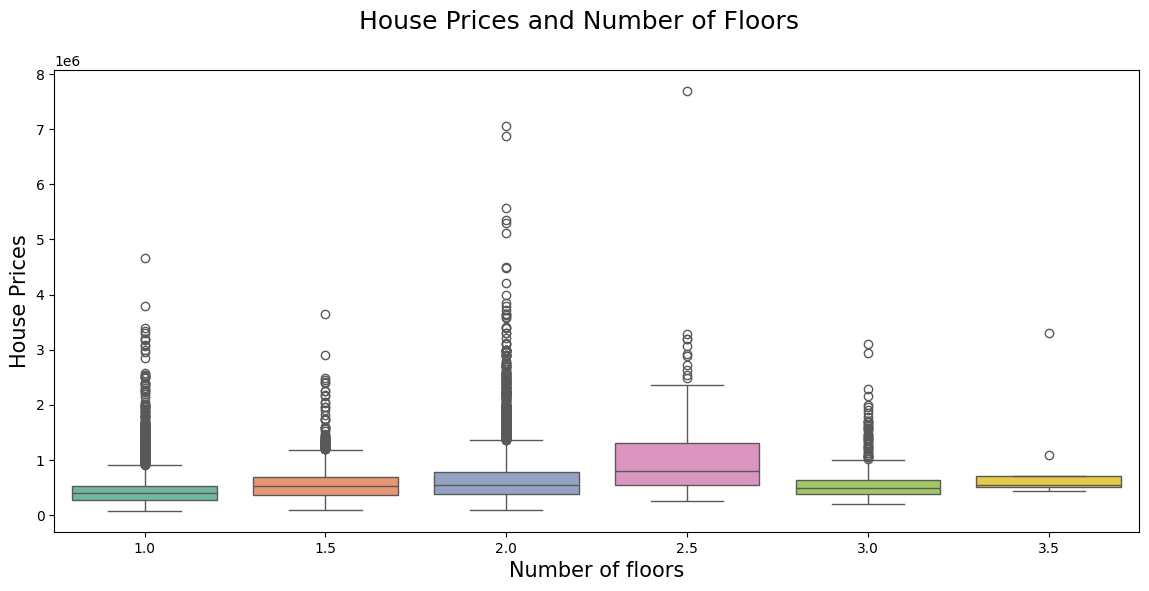

In [10]:
plt.figure(figsize=(14,6))
sns.boxplot(x = df['floors'], y=df['price'], palette="Set2")
plt.suptitle('House Prices and Number of Floors', size=18)
plt.xlabel('Number of floors', fontsize = 15)
plt.ylabel('House Prices', fontsize =15)

plt.show()